D:\adiarun\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\adiarun\Anaconda3\lib\site-packages\numpy\ma\core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


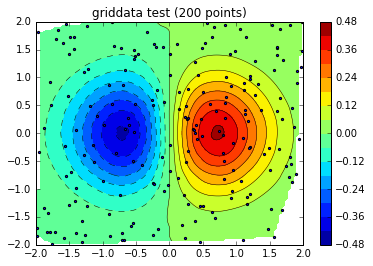

In [1]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed
# make up some randomly distributed data
seed(1234)
npts = 200
x = uniform(-2,2,npts)
y = uniform(-2,2,npts)
z = x*np.exp(-x**2-y**2)
# define grid.
xi = np.linspace(-2.1,2.1,100)
yi = np.linspace(-2.1,2.1,100)
# grid the data.
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
# contour the gridded data, plotting dots at the randomly spaced data points.
CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar() # draw colorbar
# plot data points.
plt.scatter(x,y,marker='o',c='b',s=5)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('griddata test (%d points)' % npts)
plt.show()

In [115]:
import numpy as np
import pandas as pd
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from pickle_fns import *

vesdf,data_dfs=load_pkl('tikamgarh.pkl')
E,N= vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float)

In [109]:
lllon,urlon,lllat,urlat=np.floor(min(E)),np.ceil(max(E)),np.floor(min(N)),np.ceil(max(N))

Tikamgarh


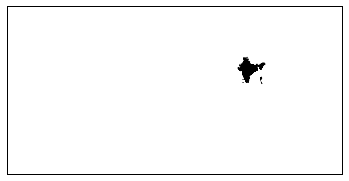

In [161]:
%matplotlib inline
from matplotlib.mlab import prctile_rank
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
file="D:\AI-ML\census\IND_adm\IND_adm2"
# ind= Basemap(projection='merc',
# lat_0=15., lon_0=82.,llcrnrlon=68.,
# llcrnrlat=5.5,
# urcrnrlon=98.5,
# urcrnrlat=35.5)
divfac=1
lllon,urlon,lllat,urlat=np.floor(divfac*min(E))/divfac,np.ceil(divfac*max(E))/divfac,np.floor(divfac*min(N))/divfac,np.ceil(divfac*max(N))/divfac
# map= Basemap(llcrnrlon=68.,llcrnrlat=5.5,urcrnrlon=98.5,urcrnrlat=35.5,resolution = 'l', epsg=24378)
# ind= Basemap(llcrnrlon=70.,llcrnrlat=15,urcrnrlon=85,urcrnrlat=25,resolution = 'l', epsg=24378)
# map= Basemap(llcrnrlon=lllon,llcrnrlat=lllat,urcrnrlon=urlon,urcrnrlat=urlat,resolution = 'l', epsg=24378)


# map = Basemap(projection='ortho',lat_0=20, lon_0=60)

# map = Basemap(projection='tmerc',
# lat_0=15., lon_0=78.,llcrnrlon=60.,
# llcrnrlat=6.5,
# urcrnrlon=98.5,
# urcrnrlat=45.5)

# ind = Basemap(llcrnrlon=70.,llcrnrlat=6.,urcrnrlon=90.,urcrnrlat=11.,
#              resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = 1)
# # llcrnrlon=3.75,llcrnrlat=39.75,urcrnrlon=4.35,urcrnrlat=40.15
# map.drawcoastlines()
map= Basemap()
shp_info=map.readshapefile(file, 'IND_adm2')
for info, lightning in zip(map.IND_adm2_info, map.IND_adm2):
    if(info['NAME_2']=='Tikamgarh'):
        print(info['NAME_2'])
        x, y = zip(*lightning) 
#         map.plot(x, y, marker=None,color='m')
#         dist_coords=np.mean(np.array(lightning),axis=0)
        break
coords=np.array(lightning)
# plt.scatter(coords[:,0],coords[:,1])
 
lonpt, latpt = map(coords[:,0],coords[:,1],inverse=True)
# divfac=10
# lllon,urlon,lllat,urlat=np.floor(min(lonpt)),np.ceil(max(lonpt)),np.floor(min(latpt)),np.ceil(max(latpt))
# lllon,urlon,lllat,urlat=np.floor(divfac*min(lonpt))/divfac,np.ceil(divfac*max(lonpt))/divfac,np.floor(divfac*min(latpt))/divfac,np.ceil(divfac*max(latpt))/divfac
# map= Basemap(llcrnrlon=68.,llcrnrlat=5.5,urcrnrlon=98.5,urcrnrlat=35.5,resolution = 'l', epsg=24378)

# ind= Basemap(llcrnrlon=70.,llcrnrlat=15,urcrnrlon=85,urcrnrlat=25,resolution = 'l', epsg=24378)

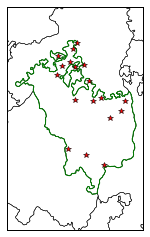

In [166]:
# lonpt, latpt = map(coords[:,0],coords[:,1],inverse=True)
# lllon,urlon,lllat,urlat=np.floor(min(lonpt)),np.ceil(max(lonpt)),np.floor(min(latpt)),np.ceil(max(latpt))
vesdf,data_dfs=load_pkl('tikamgarh.pkl')
E,N= vesdf.Easting.values.astype(np.float),vesdf.Northing.values.astype(np.float)
divfac=4
lllon,urlon,lllat,urlat=np.floor(divfac*min(lonpt))/divfac,np.ceil(divfac*max(lonpt))/divfac,np.floor(divfac*min(latpt))/divfac,np.ceil(divfac*max(latpt))/divfac
map= Basemap(llcrnrlon=lllon,llcrnrlat=lllat,urcrnrlon=urlon,urcrnrlat=urlat,resolution = 'l', epsg=24378)
shp_info=map.readshapefile(file, 'IND_adm2')
ix,iy=map(x, y)
map.plot(ix, iy, marker=None,color='g')
No = len(coords[:,0])
area = 4 * np.ones(No)
# polyx,polyy=map(coords[:,0],coords[:,1])
# plt.scatter(polyx,polyy, s=area, marker='.',color='lightgreen')
px,py=map(E,N)
plt.plot(px,py,'*r')
# lonpt, latpt

In [167]:
# map.plot(x, y, marker=None,color='m')
# plt.scatter(coords[:,0],coords[:,1], s=area, marker='.',color='lightgreen')
# plt.show()
# coords[:,0]

Tikamgarh


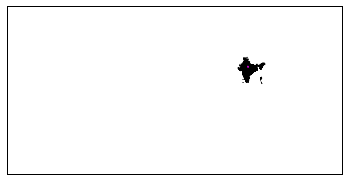

In [141]:
map.drawcoastlines()
shp_info=map.readshapefile(file, 'IND_adm2')
for info, lightning in zip(map.IND_adm2_info, map.IND_adm2):
    if(info['NAME_2']=='Tikamgarh'):
        print(info['NAME_2'])
#         dist_coords=np.mean(np.array(lightning),axis=0)
        break
coords=np.array(lightning)
# plt.scatter(coords[:,0],coords[:,1])
No = len(coords[:,0])
area = 4 * np.ones(No) 

divfac=1
lllon,urlon,lllat,urlat=np.floor(divfac*min(E))/divfac,np.ceil(divfac*max(E))/divfac,np.floor(divfac*min(N))/divfac,np.ceil(divfac*max(N))/divfac
# map= Basemap(llcrnrlon=68.,llcrnrlat=5.5,urcrnrlon=98.5,urcrnrlat=35.5,resolution = 'l', epsg=24378)

# ind= Basemap(llcrnrlon=70.,llcrnrlat=15,urcrnrlon=85,urcrnrlat=25,resolution = 'l', epsg=24378)
map= Basemap(llcrnrlon=lllon,llcrnrlat=lllat,urcrnrlon=urlon,urcrnrlat=urlat,resolution = 'l', epsg=24378)

plt.scatter(coords[:,0],coords[:,1], s=area, marker='.',color='lightgreen')
map.plot(x, y, marker=None,color='m')
px,py=map(E,N)
plt.plot(px,py,'*r')
# plt.show()


# x,y=map(E,N)
# # map.fillcontinents()
# plt.plot(x,y,'*')
plt.show()

In [134]:
x,y

((72760.71267858101,
  73907.837372693,
  74815.35325815366,
  75273.83726603072,
  75728.01118599367,
  76129.8614601409,
  76281.65117848269,
  76398.43544688518,
  76535.89636135846,
  76806.31609220034,
  77317.57603920554,
  77842.33449363103,
  78512.80815652176,
  78846.94089142163,
  78764.34798495984,
  78459.6116304372,
  77872.044678682,
  76566.86464370019,
  76352.98824253422,
  76317.73486820166,
  76393.98014548235,
  76681.35998680163,
  77452.82074259571,
  78260.93740023486,
  78510.27719594492,
  78679.83670039661,
  78719.25187452091,
  78286.11088964762,
  78059.6509524053,
  77323.61214690213,
  76800.52490413608,
  76104.66511072242,
  75834.3806786742,
  76870.80560650234,
  78653.82407905464,
  79119.35800970509,
  79423.60333968326,
  79856.08210559003,
  80287.32271436835,
  81653.82769068773,
  81920.0889300087,
  82695.24245087849,
  82880.8436378187,
  82511.17813856713,
  82947.83055138425,
  83292.84941483336,
  83806.94538814225,
  84135.75879745279,
  

Tikamgarh


RuntimeError: Buffer lengths not the same

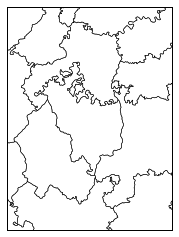

In [104]:
map= Basemap(llcrnrlon=lllon,llcrnrlat=lllat,urcrnrlon=urlon,urcrnrlat=urlat,resolution = 'l', epsg=24378)
shp_info=map.readshapefile(file, 'IND_adm2')
map.drawcoastlines()

#     if float(info['amplitude']) < 0:
#         marker = '_'
#     else:
#         marker = '+'
#     map.plot(lightning[0], lightning[1], marker=marker, color='m', markersize=8, markeredgewidth=2

In [171]:
# x

In [172]:
# np.array(lightning),np.mean(np.array(lightning),axis=0)

In [170]:
# shp_info=map.readshapefile(file, 'IND_adm2')
# # x, y = zip(*map.IND_adm2)
# # for item in ind.IND_adm2_info:
# #     print(item)
# # map.IND_adm2_info[0]
# coords=np.array(lightning)
# plt.scatter(coords[:,0],coords[:,1])
# plt.show()

In [168]:
# coords=np.array(lightning)
# len(coords[:,0]),len(coords[:,1])
# plt.scatter(coords[:,0],coords[:,1],'*')
# pl.show()

In [169]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Fixing random state for reproducibility
# np.random.seed(19680801)


# N = len(coords[:,0])
# r0 = 0.6
# x = coords[:,0]
# y = coords[:,1]
# area = 10 * np.ones(N) # 0 to 10 point radii
# c = np.sqrt(area)
# r = np.sqrt(x * x + y * y)
# area1 = np.ma.masked_where(r < r0, area)
# # area2 = np.ma.masked_where(r >= r0, area)
# # plt.scatter(x, y)
# N = len(coords[:,0])
# area = 10 * np.ones(N) 
# plt.scatter(x, y, s=area, marker='.')
# # Show the boundary between the regions:
# # theta = np.arange(0, np.pi / 2, 0.01)
# # plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

# plt.show()